In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import bt
import talib

%matplotlib inline

**GETTING DATA**

In [ ]:
raw_data =pd.read_csv('./bitcoin.csv')
raw_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_data.tail()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


**CREATING DATAFRAME**

In [ ]:
btc_data = raw_data.dropna()
btc_data.reset_index(inplace = True, drop = True)
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
btc_data['Timestamp'] = pd.to_datetime(btc_data['Timestamp'], unit='s')
btc_data.head()

<ipython-input-72-a64b88379614>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
btc_data.shape

(3613769, 8)

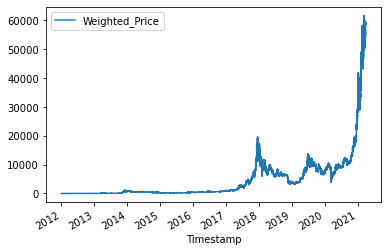

In [ ]:
btc_data.plot(x='Timestamp',y='Weighted_Price')
plt.show()

In [ ]:
btc_data.rename(columns={'date' : 'Date'}, inplace = True)

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_data.head()

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,NaN
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,0.18
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.01
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00


In [ ]:
btc_data['closeDiff'] = btc_data['Close'].diff()

<ipython-input-84-e460ab5d43bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_data['year'] = pd.DatetimeIndex(btc_data['Date']).year

<ipython-input-85-961f3018d13b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_data.set_index('Date', inplace = True)

**Resampling the data**

In [ ]:
btc_data = btc_data.resample('D').mean()
btc_data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff,year
Date,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,0.063333,2011.0
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,0.140000,2012.0
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,0.000000,2012.0
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,0.036250,2012.0
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,0.031111,2012.0


**TRADING**
*Plotting historical evolution with candlesticks*

In [ ]:
candlestick = go.Candlestick(x= btc_data['Date'], open = btc_data['Open'], high = btc_data['High'], low = btc_data['Low'], close = btc_data['Close'])

In [ ]:
fig = go.Figure(data=[candlestick])


fig.show()

*We'll take last 2 years*

In [ ]:
btc_data = btc_data.loc['2019-03-31':'2021-03-31']
btc_data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff,year
Date,,,,,,,,,
2019-03-31,4088.414992,4088.756078,4088.079902,4088.448864,1.962899,8025.180074,4088.429470,0.000948,2019.0
2019-04-01,4125.677604,4126.484410,4124.758122,4125.612770,5.203588,21444.030456,4125.683156,0.028950,2019.0
2019-04-02,4648.879365,4653.364027,4644.831675,4649.502470,21.413938,101036.768428,4649.127833,0.532666,2019.0
2019-04-03,5038.507283,5043.208082,5033.443009,5038.558555,20.376145,103151.951641,5038.385738,0.054621,2019.0
2019-04-04,4971.580299,4975.175198,4968.119548,4971.633904,11.063407,54864.981485,4971.545798,-0.048914,2019.0


In [ ]:
candlestick = go.Candlestick(x= btc_data.index, open = btc_data['Open'], high = btc_data['High'], low = btc_data['Low'], close = btc_data['Close'])

In [ ]:
fig = go.Figure(data=[candlestick])


fig.show()

**EMA**

In [ ]:
btc_data['EMA_short'] = talib.EMA(btc_data['Close'], timeperiod = 50)
btc_data['EMA_medium'] = talib.EMA(btc_data['Close'], timeperiod = 100)
btc_data['EMA_long'] = talib.EMA(btc_data['Close'], timeperiod = 200)

<ipython-input-99-03e8ebc904e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-03e8ebc904e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-03e8ebc904e9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff,year,EMA_short,EMA_medium,EMA_long
Date,,,,,,,,,,,,
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260,0.529734,2021.0,50429.944910,42929.696178,33063.672583
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824,-0.033869,2021.0,50641.908359,43185.247004,33290.253083
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819,1.259875,2021.0,50887.936659,43457.135776,33525.331460
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268,0.808704,2021.0,51180.541381,43752.031247,33772.336691
2021-03-31,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363,17.590000,2021.0,51478.487994,44049.578747,34021.151052


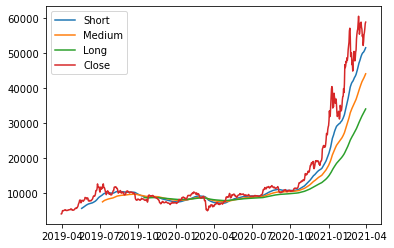

In [ ]:
plt.plot(btc_data['EMA_short'], label='Short')
plt.plot(btc_data['EMA_medium'], label='Medium')
plt.plot(btc_data['EMA_long'], label='Long')
plt.plot(btc_data['Close'], label='Close')
plt.legend()
plt.show()

**ADX**

In [ ]:
btc_data['adx'] = talib.ADX(btc_data['High'],btc_data['Low'],btc_data['Close'], timeperiod= 14)
btc_data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff,year,EMA_short,EMA_medium,EMA_long,adx
Date,,,,,,,,,,,,,
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260,0.529734,2021.0,50429.944910,42929.696178,33063.672583,18.853064
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824,-0.033869,2021.0,50641.908359,43185.247004,33290.253083,18.149339
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819,1.259875,2021.0,50887.936659,43457.135776,33525.331460,17.850632
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268,0.808704,2021.0,51180.541381,43752.031247,33772.336691,18.012543
2021-03-31,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363,17.590000,2021.0,51478.487994,44049.578747,34021.151052,18.285356


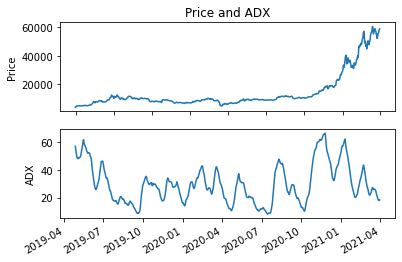

In [ ]:
fig,(ax1,ax2) = plt.subplots(2)

ax1.set_ylabel('Price')

ax1.plot(btc_data['Close'])

ax2.set_ylabel('ADX')

ax2.plot(btc_data['adx'])
fig.autofmt_xdate()
ax1.set_title('Price and ADX')

plt.show()

Market is moving sideways

**MOMENTUM**

In [ ]:
btc_data['RSI'] = talib.RSI(btc_data['Close'], timeperiod = 14)
btc_data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,closeDiff,year,EMA_short,EMA_medium,EMA_long,adx,RSI
Date,,,,,,,,,,,,,,
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260,0.529734,2021.0,50429.944910,42929.696178,33063.672583,18.853064,53.163752
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824,-0.033869,2021.0,50641.908359,43185.247004,33290.253083,18.149339,54.637918
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819,1.259875,2021.0,50887.936659,43457.135776,33525.331460,17.850632,57.095012
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268,0.808704,2021.0,51180.541381,43752.031247,33772.336691,18.012543,60.177073
2021-03-31,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363,17.590000,2021.0,51478.487994,44049.578747,34021.151052,18.285356,61.077666


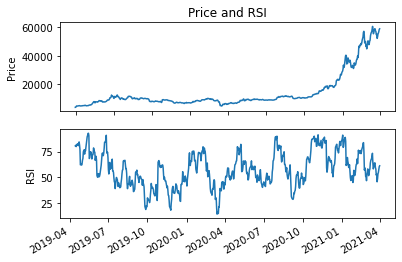

In [ ]:
fig,(ax1,ax2) = plt.subplots(2)

ax1.set_ylabel('Price')

ax1.plot(btc_data['Close'])

ax2.set_ylabel('RSI')

ax2.plot(btc_data['RSI'])
fig.autofmt_xdate()
ax1.set_title('Price and RSI')

plt.show()

Strategy

In [ ]:
bt_strategy = bt.Strategy('TradeDaily', [bt.algos.RunDaily(), bt.algos.SelectAll() , bt.algos.WeighEqually(), bt.algos.Rebalance()])

In [ ]:
bt_test = bt.Backtest(bt_strategy, btc_data)

In [ ]:
bt_res= bt.run(bt_test)

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:1244: RuntimeWarning:

invalid value encountered in double_scalars

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning:

invalid value encountered in true_divide

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:1244: RuntimeWarning:

invalid value encountered in double_scalars

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:1244: RuntimeWarning:

invalid value encountered in double_scalars

/Users/federicocrespo/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning:

invalid value encountered in true_divide

/U

<AxesSubplot:title={'center':'Backtest results'}>

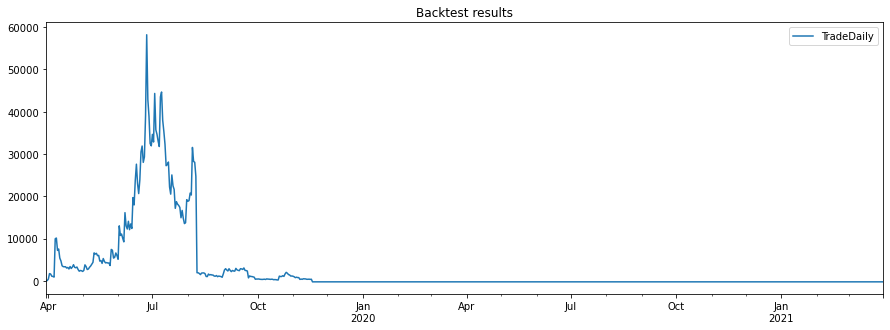

In [ ]:
bt_res.plot(title = 'Backtest results')

Since this is not insightful, I've decided to create my own signal

In [ ]:
EMA_short = talib.EMA(btc_data['Close'], timeperiod = 20).to_frame()

In [ ]:
EMA_long = talib.EMA(btc_data['Close'], timeperiod = 100).to_frame()

*Creating the signal*

In [ ]:
btc_price = btc_data['Close']

In [ ]:
signal = EMA_long.copy()
signal[EMA_long.isnull()]=0

In [ ]:
signal[EMA_short > EMA_long] = 1 #LONG POSITION

signal[EMA_short < EMA_long] =  -1 #SHORT POSITION

<AxesSubplot:xlabel='Date'>

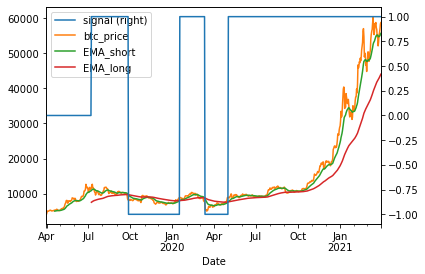

In [ ]:
combined_df = bt.merge(signal, btc_price, EMA_short, EMA_long)

combined_df.columns= ['signal', 'btc_price', 'EMA_short', 'EMA_long']

combined_df.plot(secondary_y=['signal'])

In [ ]:
bt_strategy = bt.Strategy('EMA_crossover', [bt.algos.WeighTarget(signal), bt.algos.Rebalance()] )